# SGD 회귀 기본 코드

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.regression import *

from sklearn.linear_model import SGDRegressor

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리 + 스케일링

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='무게', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44, 3), (12, 3), (44,), (12,))

## #03. SGDRegressor

### [1] 분류 모델 구현

| 하이퍼파라미터 | 설명 | 기본값 | `GridSearchCV` 추천값 |
|---------------|------|--------|-----------|
| `loss`        | 손실 함수. 데이터 유형에 맞게 선택. | `squared_error` | `{'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}` |
| `penalty`     | 정규화 종류.<br/>과적합 방지 전략에 따라 선택<br/>선형 SVM 모델의 표준 정규화 도구인 'l2'가 기본값 'l1' 및 'elasticnet'은 'l2'로는 달성할 수 없는 모델(특성 선택)에 희소성을 가져올 수 있다 | `l2` | `{'penalty': ['l2', 'l1', 'elasticnet']}` |
| `alpha`       | 정규화 강도. 낮을수록 정규화 적게 적용. 데이터에 따라 조정. | `0.0001` | `{'alpha': [0.0001, 0.001, 0.01, 0.1]}` |
| `max_iter`    | 최대 반복 횟수. 에포크 수에 해당.데이터 크기/복잡도에 따라 조정. | `1000` | `{'max_iter': [1000, 2000, 3000]}` |
| `learning_rate`| 학습률 스케줄링 전략. 문제에 맞게 선택. | `optimal` | `{'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive']}` |
| `eta0`        | 초기 학습률. 'learning_rate'가 'constant', 'invscaling', 'adaptive'일 때 사용. 실험을 통해 최적값 찾기.  | `0.01` | `{'eta0': [0.01, 0.1, 0.5]}` |
| `early_stopping` | 검증 점수가 향상되지 않을 때 훈련을 종료할지 여부 | `False` | `True`권장 | 

#### 손실함수 유형

- 'squared_error' : 최소 제곱법
- 'huber' : 는 엡실론 거리를 지나 제곱 손실에서 선형 손실로 전환하여 이상값을 수정하는 데 덜 집중하도록 'squared_error'를 수정
- 'epsilon_insensitive': 는 엡실론보다 작은 오류를 무시하고 그보다 선형적임 
- 'squared_epsilon_insensitive' : epsilon_insensitive과 동일하지만 허용 오차 엡실론을 초과하는 제곱 손실

In [4]:
estimator = SGDRegressor()

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  0.9356044442485549
검증데이터 점수:  0.9548613884391136


### [2] 성능평가

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.935604 |     0.954861 |
| 평균절대오차(MAE)             |      66.4126 |      58.2855 |
| 평균제곱오차(MSE)             |      7572.75 |      5325.94 |
| 평균오차(RMSE)                |      87.0215 |       72.979 |
| 평균 절대 백분오차 비율(MAPE) |      149.361 |      21.9793 |
| 평균 비율 오차(MPE)           |      120.014 |     -17.4821 |
+-------------------------------+--------------+--------------+

[학습곡선]


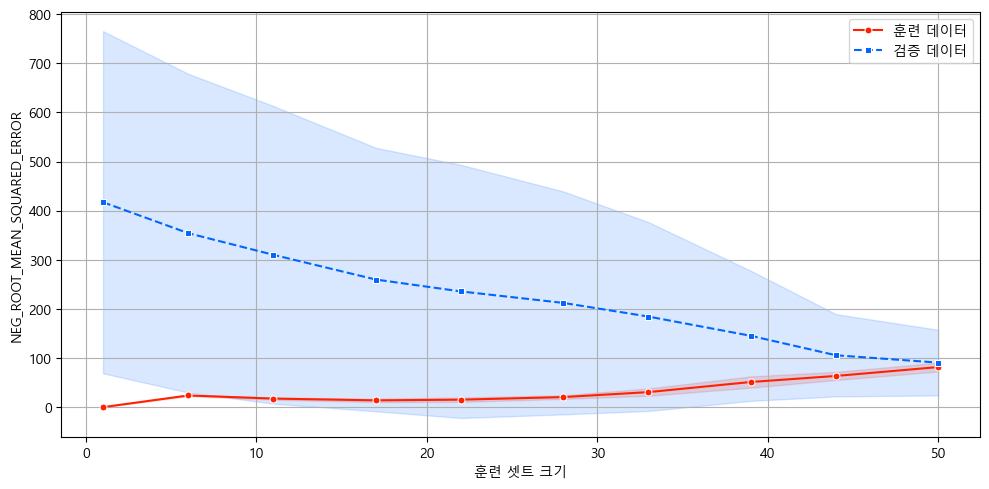

In [5]:
my_regression_result(estimator, x_train, y_train, x_test, y_test)

## #04. 모듈화 기능 확인

### [1] SVR

SVR {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
[교차검증 TOP5]
+----+----------+----------+-----+-------------------+
|    | kernel   |   degree |   C |   mean_test_score |
|----+----------+----------+-----+-------------------|
| 35 | sigmoid  |        5 |  10 |          0.549307 |
| 32 | sigmoid  |        4 |  10 |          0.549307 |
| 29 | sigmoid  |        3 |  10 |          0.549307 |
| 26 | sigmoid  |        2 |  10 |          0.549307 |
| 28 | poly     |        3 |  10 |          0.417828 |
+----+----------+----------+-----+-------------------+

[Best Params]
{'kernel': 'sigmoid', 'degree': 2, 'C': 10}
[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.642159 |     0.571041 |
| 평균절대오차(MAE)             |      112.957 |      138.663 |
| 평균제곱오차(MSE)             |      420

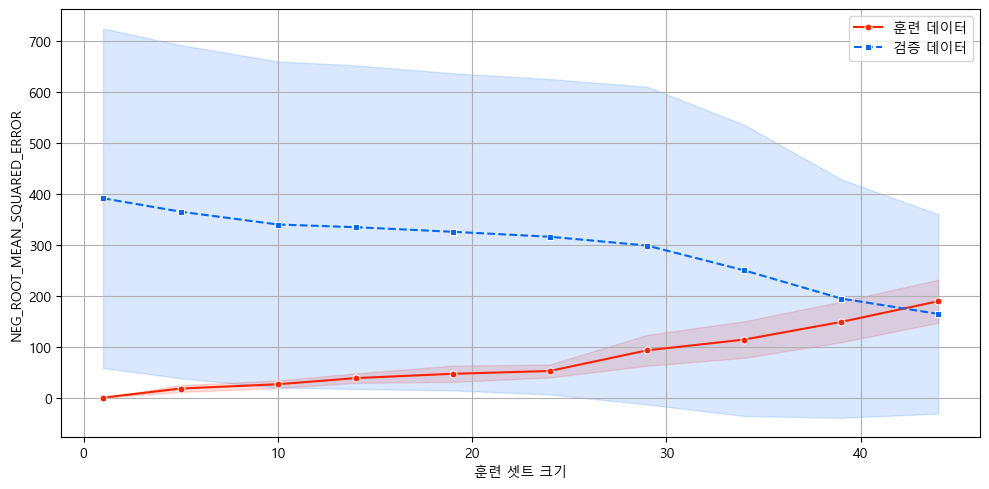


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | 무게       | 길이       | 25.2841 |
|  1 | 무게       | 높이       | 63.9335 |
|  2 | 무게       | 두께       | 25.8528 |
+----+------------+------------+---------+


SVR(C=10, degree=2, kernel='sigmoid')

In [6]:
my_svr_regression(x_train, y_train, x_test, y_test)

### [2] 지금까지의 모든 예측 모형 비교

In [7]:
my_regression(x_train, y_train, x_test, y_test)

LinearRegression의 n_jobs 설정됨
LinearRegression {}
Ridge의 random_state 설정됨
Ridge {'alpha': [0.01, 0.1, 1, 10, 100]}
Lasso의 random_state 설정됨
Lasso {'alpha': [0.01, 0.1, 1, 10, 100]}
KNeighborsRegressor의 n_jobs 설정됨
KNeighborsRegressor {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
DecisionTreeRegressor의 random_state 설정됨
DecisionTreeRegressor {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
SVR {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
SGDRegressor의 random_state 설정됨
SGDRegressor의 early_stopping 설정됨
SGDRegressor {'loss': ['squared_error', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+-----------------------+----------------+---------------------+---------------------+-----

{'LinearRegression': LinearRegression(n_jobs=-1),
 'Lasso': Lasso(alpha=10, random_state=1234),
 'Ridge': Ridge(alpha=10, random_state=1234),
 'DecisionTreeRegressor': DecisionTreeRegressor(criterion='absolute_error', random_state=1234),
 'SVR': SVR(C=10, degree=2, kernel='sigmoid'),
 'KNeighborsRegressor': KNeighborsRegressor(metric='manhattan', n_jobs=-1, weights='distance'),
 'SGDRegressor': SGDRegressor(alpha=0.01, early_stopping=True, eta0=0.1, random_state=1234)}